### GATIN Juliette – LANNELONGUE Vincent

# Projet numérique : câble sous-marin

## Questions théoriques

**1.** Dans l'énoncé du problème, on choisit d'approcher l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles:
$$L^\star=\sum_{k=1}^K l_{(k)}.$$ 
Pour cela, on se place dans le câdre d'application de la loi forte des grands nombres.  Celle-ci montre que pour un très grand nombre d'expériences, la moyenne des résultats tend vers l'espérance de la variable.

**2.** Loi conditionnelle du vecteur des composantes de $Z$ correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d'observation :

Posons $J = \{j_{1}, \dots, j_{n}\}$, ensemble des points de discrétisation aux sites d'observation.

On souhaite exprimer $f_{Y|X=x}$, la densité conditionnelle de $Y = (Z(x_{i}))_{i \in \{0, \dots, N\} \backslash J}$ (vecteur des composantes de $Z$ aux points de discrétisation sans observation) sachant $X = (X(x_{j_1}),\dots,X(x_{j_n}))=(z(x_{j_1}),\dots, z(x_{j_n})) = x $ ie les valeurs prises par les composantes aux sites d'observation. 

On a vu au chapitre II de probabilités que la densité du vecteur $Z$ s'écrit pour $z\in \mathbb{R_{-}}^N$ : $$f_Z(z) = \frac{1}{(2\pi)^{N/2}\sqrt{\det (C)}}\exp \left(-\frac{1}{2}(z-\mu)^t C^{-1}(z-\mu)\right)$$

D'après le cours de probabilités IV sur les vecteurs Gaussiens à densité, on a que $f_Z = f_{Y|X=x} f_X,$ où $f_X$ est la densité marginale de $X$. On cherche donc à décomposer $f_Z$ de la sorte. On note $\mu = (\mu_Y,\mu_X)$ et on remarque que $C$ peut se décomposer en blocs qui à réordonner/réindicer les indices :

$C =\begin{pmatrix}
   C_Y & C_{Y,X}\\
  C_{X,Y} & C_X  \\ 
 \end{pmatrix}$
où $C_Y = Cov(Y,Y)$, $C_X = Cov(X,X)$ et $C_{Y,X} = Cov(Y,X)$. 

Grâce au complément de Schur, on peut exprimer l'inverse de $C$, $C^{-1}$ et, en réarrangeant les termes de la forme quadratique dans $f_Z$ et on en déduit ainsi que :

$$f_{Y|X=x}(y) = \frac{1}{(2\pi)^{N/2}\sqrt{\det (CS_Y)}}\exp \left(-\frac{1}{2}\left(y - \psi(x)\right)^t CS_Y^{-1}\left(y - \psi(x))\right)\right)$$

C'est-à-dire que la variable aléatoire $Y|X=x$ est gaussienne d'espérance $\mu_{Y|X=x} = \psi(x) = \mu_Y + C_{Y,X}C_X^{-1}(x-\mu_X)$ et de matrice de covariance $CS_Y = C_Y - C_{Y,X}C_X^{-1}C_{X,Y}$. Autrement dit, l'espérance conditionnelle de $Y$ sachant $X$ est la variable aléatoire $\mathbb{E}(Y|X) = \psi(X) =(\mu_Y + C_{Y,X}C_X^{-1}(X-\mu_X))$. On notera que la covariance conditionnelle donnée par $CS_Y$ ne dépend pas de la valeur prise par $X$.

**3.** Considérons $Y=(Y_1,\dots,Y_p)$, un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1.  Cherchons la loi du vecteur $Z=m+RY$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ : 



Par définition, toute combinaison linéaire de vecteurs gaussiens est un vecteur gaussien. Donc, comme $Y = (Y_1,\dots,Y_p)$ de composantes gaussiennes, $Z = m + RY$ est gaussien.

Calculons son espérance et sa matrice de covariance :

$\mathbb{E}(Z) = \mathbb{E}(m+RY) = m+R\mathbb{E}(Y)$ or $\forall i, \mathbb{E}(Y_{i})=0$ d'où $\mathbb{E}(Z) = m$.

Calculons le coefficient $Cz_{i,j}$ de la matrice de covariance $Cz$ avec $i, j \in \{1, \dots, p\}$

Notons $m=(m_{1}, \dots, m_{p})$ et $[R]_{i,j} = r_{ij}$, on a :

$$Cz_{i,j} = Cov(m_{i}+(RY)_{i}, m_{j}+(RY)_{j})$$
$$ = \mathbb{E}((m_{i}+(RY)_{i}) - \mathbb{E}(m_{i}+(RY)_{i}))((m_{j}+(RY)_{j}) - \mathbb{E}(m_{j}+(RY)_{j})))$$
$$ = \mathbb{E}((\displaystyle\sum_{k=1}^{p} r_{i,k}Y_{k} - \displaystyle\sum_{k=1}^{p} r_{i,k} \mathbb{E}(Y_{k}))(\displaystyle\sum_{k=1}^{p} r_{j,k}Y_{k} - \displaystyle\sum_{k=1}^{p} r_{j,k} \mathbb{E}(Y_{k})))$$

Or, $\forall k \in \{1, \dots, p \} : \mathbb{E}(Y_{k})=0$

Ainsi, $$Cz_{i,j} = \mathbb{E}((\displaystyle\sum_{k=1}^{p} r_{i,k}Y_{k})(\displaystyle\sum_{k=1}^{p} r_{j,k}Y_{k}))$$
$$ = \mathbb{E}(\displaystyle\sum_{1\leq l,k \leq p} r_{i,k}r_{j,l}Y_{k}Y_{l})$$
$$ = \displaystyle\sum_{1\leq l,k \leq p} r_{i,k}r_{j,l}\mathbb{E}(Y_{k}Y_{l})$$

Or, calculons le coefficient de $Cy_{i,j}$ de la matrice de covariance de Y : 

$$Cy_{i,j}= Cov(Y_{i}, Y_{j}) = \mathbb{E}((Y_{i}-\mathbb{E}(Y_{i}))(Y_{j}-\mathbb{E}(Y_{j}))) = \mathbb{E}(Y_{i}Y_{j})$$

Mais, en sachant que  $\forall i, j \in \{1, \dots, p \} : Y_{i}$ et $Y_{j}$ sont indépendantes, on a :

$$Cy_{i,j}= Cov(Y_{i}, Y_{j}) = \delta{ij} $$

i.e. : $Cy = Id_{p}$ .

D'où : $Cz_{i,j} =  \displaystyle\sum_{1\leq l,k \leq p} r_{i,k}r_{j,l}Cy_{k,l} = (RCyR^{t})_{i,j} = (RR^{t})_{i,j}$

Ainsi, $Cz = RR^{t}$ et, comme chaque composante de $Z$ est gaussienne, comme combinaison linéaire de composantes gaussiennes, on peut appliquer un principe de linéarité :

$$ Z=m+RY \sim \mathcal{N}(m,RR^{t}) $$

**4.** Pour effectuer une simulation conditionnelle, on se propose donc de simuler des lois normales simples, ici les gaussiennes $\mathbf{Y}=(Y_1,\dots,Y_p)$ telles que décrites précédemment et on choisit $m$ et $R$ afin d'obtenir l'espérance $m$ et la matrice de covariance $C$ souhaitées pour $Z$.

Pour effectuer une simulation conditionnelle, on se propose donc de simuler des lois normales simples. Soit donc $\mathbf{W}=(W_1,\dots,W_{N-n})$ un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1. A partir de ces simulations, on peut simuler le vecteur $Y|X$ tel que décrit en question 2 (i.e. le vecteur des composantes de $Z$ aux points de discrétisation sans observation, sachant les composantes connues) grâce à la question 3.

On doit choisir $m$ et $R$ afin d'avoir $Y = m + RW \sim \mathcal{N}(\mathbb{E}(Y|X),CSy)$.

Pour $m$, d'après les questions 2 et 3, il suffit de prendre :

$$ m = \mathbb{E}(Y|X) = \mu_Y + C_{Y,X}C_X^{-1}(X-\mu_X)$$

Pour $R$, d'après la question 3, il faut que $CSy = RR^{t}$ . Or, d'après le poly de cours Probabilités V, et comme $CSy$ est une matrice inversible, on peut déterminer une matrice $R$ qui convient, en écrivant la factorisation de Cholesky de la matrice $CSy$.

## Implémentation

### Préambule

***Chargement de dépendances***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math

***Discrétisation***

In [2]:
A = 0
B = 500
N = 101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

***Paramètres du modèle***

In [3]:
mu = -5
a = 50
sigma2 = 12

***Données***

In [4]:
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

***Indices des composantes correspondant aux observations et aux componsantes non observées***


In [5]:
unknown_indexes = list(set(discretization_indexes)-set(observation_indexes))

### Questions

**1.** Fonction qui prend en argument la distance entre les points (ici, matrice de distances), le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points (ici, matrice de covariance) :

In [6]:
# Correspond à la fonction C(h) donnée dans l'énoncé
def cov(dist_H, a, sigma_carre):
    return sigma_carre * np.exp(-dist_H/a)

**2.** Calcul de la matrice de distance $H$, correspondant à la distance entre chaque point : 

In [7]:
H = np.array([[Delta*abs(i-j) for i in range(N)] for j in range (N)])

**3.** Calcul de la matrice de covariance du vecteur $Z=(Z(x_0),\dots,Z(x_N))$ :

In [8]:
cov_Z = cov(H, a, sigma2)

**4.** Extraction des 3 matrices de covariance suivantes :

 - entre les observations : il suffit d'extraire les éléments d'indices dans la liste observations_indexes. Il s'agit de $C_{X}$ (cf. question théorique 2).

In [9]:
cov_X = np.array([[cov_Z[i, j] for i in observation_indexes] for j in observation_indexes])

- entre les observations et les inconnues: il s'agit de $C_{X,Y}$ (ou $C_{Y,X}$).

In [10]:
cov_YX = np.array([[cov_Z[i, j] for i in observation_indexes] for j in unknown_indexes])
cov_XY = np.transpose(cov_YX)

- entre les inconnues : on extrait que les éléments d'indices de la liste observations_indexes. Il s'agit de $C_{Y}$.

In [11]:
cov_Y = np.array([[cov_Z[i, j] for i in unknown_indexes] for j in unknown_indexes])

**5.** Calcul de l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données : 

D'après la partie Questions théoriques, question 2 et avec les mêmes notations, on a : 
$\mathbb{E}(Y|X) = (\mu_Y + C_{Y,X}C_X^{-1}(X-\mu_X))$
Dans notre code, on a $C_X$ = cov_X et $C_{Y,X}$ = cov_YX. D'où:


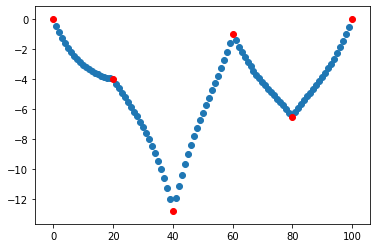

In [12]:
mu_x = np.array([mu for i in observation_indexes])
mu_y = np.array([mu for i in unknown_indexes])
def Eyx(X):
    return mu_y + (cov_YX.dot(np.linalg.inv(cov_X))).dot(X - mu_x)

E_YX = Eyx(depth)

plt.scatter(unknown_indexes, E_YX)
plt.scatter(observation_indexes, depth, color = 'red')
plt.show()

**6.** Calcul de la matrice de variance conditionnelle et tracée de sa diagonale en fonction de la position :

D'après la partie Questions théoriques, question 2, on a : $CS_Y = C_Y - C_{Y,X}C_X^{-1}C_{X,Y}$ la matrice de covariance de la variable aléatoire $Y|X=x$. 

In [13]:
cov_cond = cov_Y - (cov_YX.dot(np.linalg.inv(cov_X))).dot(cov_XY)

Traçons maintenant sa diagonale en fonction de la position.

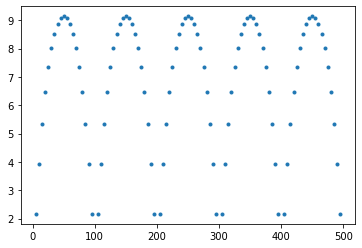

In [14]:
position_cond = np.array(unknown_indexes)*Delta
diagonale = np.array([cov_cond[i,i] for i in range (len(cov_cond))])
plt.plot(position_cond, diagonale, '.')
plt.show()

***Commentaires :***

On remarque logiquement que la variance augmente avec la distance à un point dont la profondeur est connue. Cela vient bien sûr de la fonction $C(h)$ : plus 2 points sont proches, plus ils ont tendance à avoir des profondeurs proches. 

Ainsi, le point adjacent (point 1) à une valeur connue (point 0) ne peut que peu s'en éloigner vers le haut ou le bas (en terme de profondeur). Le point suivant (point 2) s'éloigne peu du point 1, mais sa variance est plus grande, puisqu'on cumule potentiellement 2 éloignements (point 1 + point 2) dans le même sens. Et ainsi de suite, on obtient bien une variance maximale pour le point au milieu de 2 points connus, c'est-à-dire le point le plus éloigné d'une valeur connue.

**7.** Pour une simulation conditionnelle : 

On doit d'abord simuler une variable suivant une loi normale centrée réduite. Puis, on simule cette loi $N-n$ fois afin de simuler un vecteur W. Pour cela, on utilise la méthode de Box-Muller telle que décrite dans le cours :

In [15]:
def W():
    W = np.zeros(len(unknown_indexes))
    for i in range (len(unknown_indexes)):
        U = np.random.uniform()
        V = np.random.uniform()
        W[i] = np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)
    return W

Déduisons maintenant une simulation du vecteur $Y$ de la simulation du vecteur $W$. Il faut pour cela déterminer les $m$ et $R$ définis dans la partie Questions théoriques, question 4, et ensuite écrire : $Y = m + RW$

In [16]:
R = np.linalg.cholesky(cov_cond)
def simulation_cond():     #Ici, on renvoie seulement les profondeurs simulées
    return E_YX + R.dot(W())

def simulation():         # Ici, on intègre à la liste les points déjà connus
    S = np.zeros(N)       # On renvoie donc une liste de toutes les profondeurs
    ind_obs = 0           # On va parcourir les listes de profondeur, et ajouter dans l'ordre les profondeurs à S
    ind_unk = 0
    sim = simulation_cond()
    for i in range(N):
        if i in unknown_indexes:
            S[i] = sim[ind_unk]
            ind_unk+=1
        if i in observation_indexes:
            S[i] = depth[ind_obs]
            ind_obs+=1
    return S


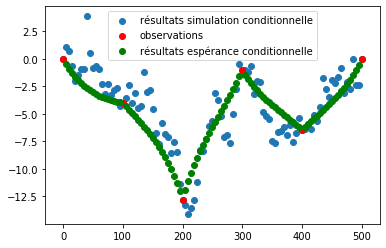

In [315]:
plt.scatter(discretization, simulation(), label = 'résultats simulation conditionnelle')
plt.scatter([indexes*Delta for indexes in observation_indexes], depth, color = 'red', label = 'observations')
plt.scatter([indexes*Delta for indexes in unknown_indexes], E_YX, color = 'green', label = 'résultats espérance conditionnelle' )
plt.legend()
plt.show()

***Commentaires :***

**8.** Fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation $Delta$ : 

In [18]:
def long_cable(vect, Delta) :
    S = 0
    for i in range(len(vect)-1):
        S += np.sqrt(Delta**2 + (vect[i+1] - vect[i])**2)
    return S

**9.** Calcul de la longueur du câble à partir de 100 simulations:

Fonction qui réalise $n$ simulations :

In [19]:
def long_simulee(n):
    L = []
    for i in range(0, n):
        Z = simulation() #on place ici, le résultat de la fonction écrite à la question 7
        L.append(long_cable(Z, Delta))
    return L

Comme avec la fonction simulation(), on écrit une fonction esp_tot(E_XY) qui regroupe l'espérance conditionnelle avec les valeurs connues (dont l'espérance est par conséquent égale à la valeur).

In [20]:
def esp_tot(E_cond):         
    E = np.zeros(N)       
    ind_obs = 0           
    ind_unk = 0
    for i in range(N):
        if i in unknown_indexes:
            E[i] = E_cond[ind_unk]
            ind_unk+=1
        if i in observation_indexes:
            E[i] = depth[ind_obs]
            ind_obs+=1
    return E

In [21]:
L_100 = long_simulee(100)
L_esp = long_cable(esp_tot(E_YX), Delta) 

***Comparaison entre l’espérance conditionnelle (estimée) de la longueur avec la longueur de l’espérance conditionnelle :***

In [321]:
print(f"L'espérance conditionnelle estimée de la longueur est de {np.round(np.average(L_100), 3)} mètres.")
print(f"Alors que la longueur de l'espérance conditionnelle est de {np.round_(L_esp, 3)} mètres.")

L'espérance conditionnelle estimée de la longueur est de 522.523 mètres.
Alors que la longueur de l'espérance conditionnelle est de 501.647 mètres.
1582309276.391017


On constate donc que la longueur de l'espérance conditionnelle est toujours une trentaine de mètres inférieure à l'espérance conditionnelle estimée de la longueur. Cela s'explique par le fait que l'espérance conditionnelle s'approche d'une longueur minimale du cable donc plus lisse. (cf. figure Question 7)

**10.** Représentation de la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations :

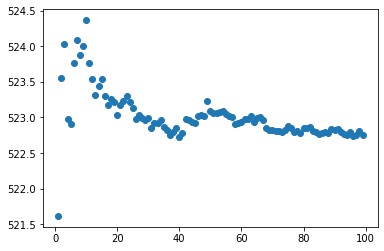

In [24]:
nombre_sim_100 = np.arange(100)
M_100 = np.array([np.average(L_100[:n]) for n in nombre_sim_100])

plt.scatter(nombre_sim_100, M_100)
plt.show()

***Commentaires :*** On observe une convergence vers environ 523m de câble quand le nombre de simulations augmente. On a ici fait le choix de calculer tous les $M_n$ avec une seule simulation initiale L_100 afin de réduire le temps d'exécution (sans ce choix, le temps atteignait le quart d'heure pour 100 000 simulations).

**11.** Histogramme des longueurs de câbles générées :

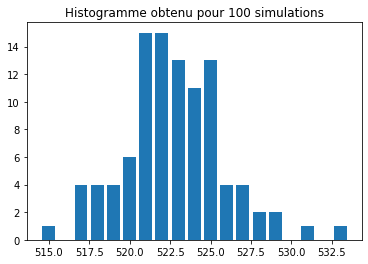

In [25]:
def arrondi(X):
    return np.round(X, 0)

def hist(X):
    X_int = arrondi(X)
    valeurs = []
    for x in X_int :
        if x not in valeurs :
            valeurs.append(x)
    H = np.zeros(len(valeurs))
    for i in range(len(valeurs)) : 
        for x in X_int :
            if x==valeurs[i] :
                H[i]+=1
    return (np.array(valeurs),H)

n = 100 

plt.bar(hist(L_100)[0], hist(L_100)[1])
plt.title(f"Histogramme obtenu pour {n} simulations")
plt.show()

**12.** Intervalle de confiance à 95% de la longueur du câble :

***Méthode 1 :***

D'après le cours, le théorème central limite permet de construire des tests de convergence et de bornes de confiance asymptotiques pour $M_n(h)$. Par exemple, on aura : $$\mathbb{P}\left(\mathcal{I} \in \left[M_n(h) - 1.96 \sigma_n,M_n(h) + 1.96 \sigma_n\right]\right) \approx 0.95,$$ 
où on approxime la variance $\sigma_n^2$ par la quantité : $$\sigma_n^2=\frac{1}{n}\sum_{i=1}^{n}\left( Z_i-M_n\right)^2.$$ 

Ainsi :

In [60]:
L_100 = long_simulee(100)
Mn = 1/len(L_100) * sum(L_100)

sigmacarre = 1/len(L_100) * sum((L_100[i] - Mn)**2 for i in range(0, len(L_100)))
print(f"L'intervalle de confiance à 95% de la longueur du câble est [{Mn - 1.96 * np.sqrt(sigmacarre)}, {Mn + 1.96 * np.sqrt(sigmacarre)}]")

L'intervalle de confiance à 95% de la longueur du câble est [516.4559908965279, 528.3868933644732]


***Méthode 2 :***

**13.** Estimation de la probabilité que la longueur du câble dépasse 525 mètres :

Faisons un nombre grand simulation et comptons les cas favorables. Approchons ensuite cette probabilité par le rapport des cas favorables sur le nombre total de simulations :

In [ ]:
def prob(n, Liste):
    cas_fav = 0
    for long in Liste:
        if long > 525:
            cas_fav += 1
    print(f'La probabilité que la longueur de câble dépasse 525 mètres, arrondie au centième, vaut approximativement {np.round(cas_fav/n, 2)}')

In [44]:
n = 100
L_100 = long_simulee(n)

prob(n, L_100)

La probabilité que la longueur de câble dépasse 525 mètres, arrondie au centième, vaut approximativement 0.19


**14.** 

- Pour 1 000 simulations :

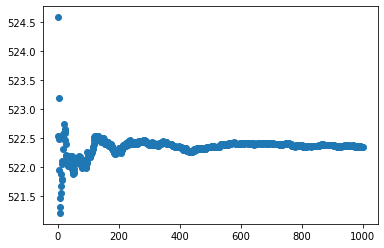

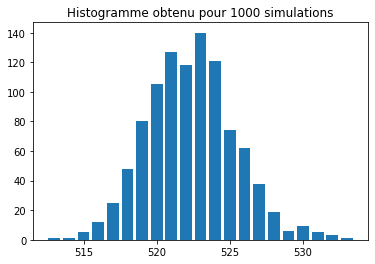

La probabilité que la longueur de câble dépasse 525 mètres, arrondie au centième, vaut approximativement 0.181


In [45]:
L_1000 = long_simulee(1000)
n = 1000

nombre_sim_1000 = np.arange(1000)
M_1000 = np.array([np.average(L_1000[:n]) for n in nombre_sim_1000])
plt.scatter(nombre_sim_1000, M_1000)
plt.show()
plt.bar(hist(L_1000)[0], hist(L_1000)[1])
plt.title(f"Histogramme obtenu pour {n} simulations")
plt.show()
prob(n, L_1000)

- Pour 10 000 simulations :

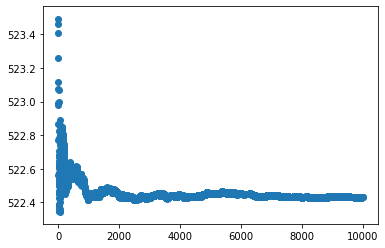

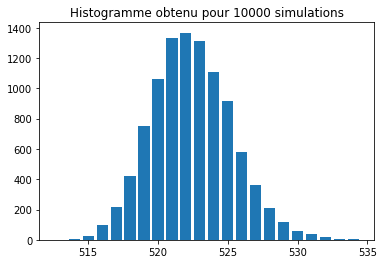

La probabilité que la longueur de câble dépasse 525 mètres, arrondie au centième, vaut approximativement 0.1798


In [46]:
L_10000 = long_simulee(10000)
n = 10000

nombre_sim_10000 = np.arange(10000)
M_10000 = np.array([np.average(L_10000[:n]) for n in nombre_sim_10000])
plt.scatter(nombre_sim_10000, M_10000)
plt.show()
plt.bar(hist(L_10000)[0], hist(L_10000)[1])
plt.title(f"Histogramme obtenu pour {n} simulations")
plt.show()
prob(n, L_10000)

- Pour 100 000 simulations : le temps d'exécution commence à être long...

In [ ]:
import time
t1 = time.time()
L_100000 = long_simulee(100000)
n = 100000
nombre_sim_100000 = np.arange(100000)
M_100000 = np.array([np.average(L_100000[:n]) for n in nombre_sim_100000])
plt.scatter(nombre_sim_100000, M_100000)
plt.show()
plt.bar(hist(L_100000)[0], hist(L_100000)[1])
plt.title(f"Histogramme obtenu pour {n} simulations")
plt.show()
prob(n, L_100000)
t2 = time.time()
print(t2 - t1)

***Commentaires :*** L'histogramme ressemble de plus en plus à une gaussienne de moyenne 523m environ.